# Inheritance with the Gaussian Class

The Gaussian distribution code is refactored into a generic Distribution class and a Gaussian distribution class. 

The Distribution class takes care of the initialization and the read_data_file method. Then the rest of the Gaussian code is in the Gaussian class.


In [1]:
class Distribution:
    def __init__(self, mu=0, sigma=1):
        """Generic distribution class for calculating and visualizing a probability distribution.
        
        Attributes:
            mean (float): mean value of the distribution
            stdev (float): standard deviation of the distribution
            data (list of floats): list of floats extracted from the data file
        """
        self.mean = mu
        self.stdev = sigma
        self.data = []

    def read_data_file(self, file_name):
        """Reads in data from a txt file and stores it in the data attribute.
        
        Args:
            file_name (str): name of the file to read from
        
        Returns:
            None
        """
        with open(file_name) as file:
            self.data = [float(line.strip()) for line in file]

In [2]:
import math
import matplotlib.pyplot as plt

class Gaussian(Distribution):
    """Gaussian distribution class for calculating and visualizing a Gaussian distribution."""
    
    def __init__(self, mu=0, sigma=1):
        super().__init__(mu, sigma)

    def calculate_mean(self):
        """Calculates the mean of the data set."""
        self.mean = sum(self.data) / len(self.data)
        return self.mean

    def calculate_stdev(self, sample=True):
        """Calculates the standard deviation of the data set."""
        n = len(self.data) - 1 if sample else len(self.data)
        mean = self.calculate_mean()
        variance = sum((d - mean) ** 2 for d in self.data) / n
        self.stdev = math.sqrt(variance)
        return self.stdev

    def plot_histogram(self):
        """Outputs a histogram of the instance variable data."""
        plt.hist(self.data, bins=30, color='skyblue', edgecolor='black')
        plt.title('Histogram of Data')
        plt.xlabel('Data')
        plt.ylabel('Count')
        plt.show()

    def pdf(self, x):
        """Calculates the probability density function for the Gaussian distribution."""
        return (1.0 / (self.stdev * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - self.mean) / self.stdev) ** 2)

    def plot_histogram_pdf(self, n_spaces=50):
        """Plots the normalized histogram of the data and a plot of the PDF."""
        min_range = min(self.data)
        max_range = max(self.data)
        x = [min_range + i * (max_range - min_range) / n_spaces for i in range(n_spaces)]
        y = [self.pdf(val) for val in x]

        fig, axes = plt.subplots(2, sharex=True)
        fig.subplots_adjust(hspace=0.5)

        axes[0].hist(self.data, bins=30, density=True, color='skyblue', edgecolor='black')
        axes[0].set_title('Normalized Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y, color='red')
        axes[1].set_title('PDF for Sample Mean and Standard Deviation')
        axes[1].set_ylabel('Density')
        axes[1].set_xlabel('Data')

        plt.show()

        return x, y

    def __add__(self, other):
        """Adds two Gaussian distributions and returns a new Gaussian."""
        if not isinstance(other, Gaussian):
            raise TypeError("Operand must be an instance of Gaussian")

        result = Gaussian(
            self.mean + other.mean,
            math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        )
        return result

    def __repr__(self):
        """Returns the string representation of the Gaussian instance."""
        return f"mean {self.mean}, standard deviation {self.stdev:.2f}"

In [3]:
# initialize two gaussian distributions
gaussian_one = Gaussian(25, 3)
gaussian_two = Gaussian(30, 2)

# initialize a third gaussian distribution reading in a data efile
gaussian_three = Gaussian()
gaussian_three.read_data_file('numbers.txt')
gaussian_three.calculate_mean()
gaussian_three.calculate_stdev()

92.87459776004906

In [4]:
# print out the mean and standard deviations
print(gaussian_one.mean)
print(gaussian_two.mean)

print(gaussian_one.stdev)
print(gaussian_two.stdev)

print(gaussian_three.mean)
print(gaussian_three.stdev)

25
30
3
2
78.0909090909091
92.87459776004906


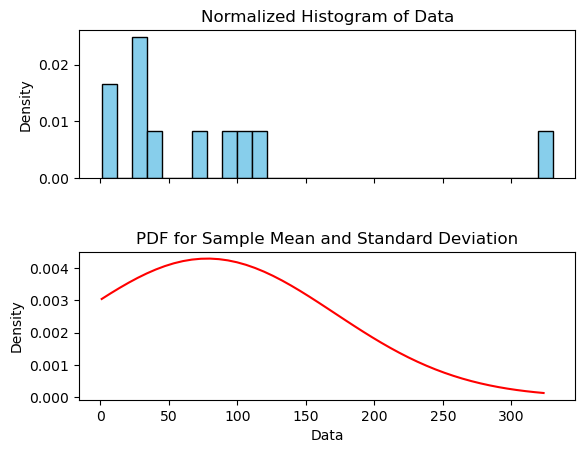

([1.0,
  7.58,
  14.16,
  20.74,
  27.32,
  33.9,
  40.48,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84,
  323.42],
 [0.0030436941280150395,
  0.0032199635775976665,
  0.003389385629106679,
  0.003549858809298968,
  0.0036993144412822716,
  0.0038357605437130374,
  0.003957325730527453,
  0.004062301768846044,
  0.004149183447609647,
  0.004216704458941581,
  0.004263868097796145,
  0.004289971740008139,
  0.004294624258609417,
  0.004277755775037969,
  0.0042396194054553134,
  0.004180784941175556,
  0.004102124683731816,
  0.004004791926750454,
  0.0038901928264981145,
  0.003759952619833299,
  0.003615877323227138,
  0.0034599121726

In [5]:
# plot histogram of gaussian three
gaussian_three.plot_histogram_pdf()

In [6]:
# add gaussian_one and gaussian_two together
gaussian_one + gaussian_two

mean 55, standard deviation 3.61